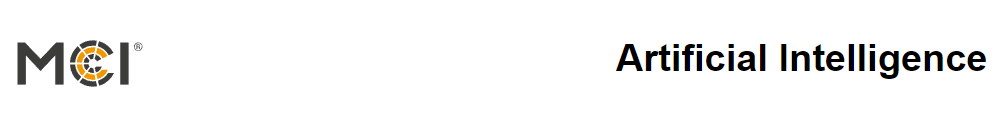

---
# 01 a Descriptive Statistics in Datasets

Descriptive statistics play a crucial role in understanding datasets in machine learning by summarizing key characteristics of the data. These statistics include measures of central tendency such as mean, median, and mode, which help in understanding the data’s distribution. Additionally, dispersion metrics like standard deviation, variance, and interquartile range provide insights into the spread and variability of the dataset. Other important aspects include skewness and kurtosis, which describe the shape and asymmetry of the data distribution. Descriptive statistics are essential for data preprocessing, detecting anomalies, and making informed decisions before applying machine learning models. They help identify potential biases, missing values, and outliers, ensuring the dataset is clean and representative before training a model.

As always we want to explain things with an example. Therefore we start with some data we have from shooting in the sport of biathlon.

As always we import the relevant packages and libraries

In [2]:
from scipy.io import loadmat # to be able to load .fig files from MATLAB
import os # to be able to operate on files and folders
import pandas as pd # we need this to be able to create pandas dataframes
import matplotlib.pyplot as plt # we need this to be able to plot data
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns

Now we can load the data

In [4]:
df_score_csv = pd.read_csv("../Data/Biathlon_Shooting_Trigger/Full_Scores_Biathlon_2014_Complete_II.CSV",delimiter=';')

The data shows the score of an athlete on the shooting range. Lets have a look at the data comprehension

In [5]:
df_score_csv.info()
df_score_csv.describe()

<class 'pandas.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   trial   1095 non-null   str  
 1   score   1095 non-null   int64
dtypes: int64(1), str(1)
memory usage: 17.2 KB


,score
count,1095.000000
mean,7.399087
std,2.371101
min,0.000000
25%,6.000000
50%,8.000000
75%,9.000000
max,10.000000


There is a coloumn that says trial, which has embedded the information about the shooting pose (prone or standing) and load state (rested, loaded)

In [6]:
df_score_csv['prone'] = df_score_csv['trial'].str.contains('prone', case=False, na=False).astype(int)
df_score_csv['rest'] = df_score_csv['trial'].str.contains('rest', case=False, na=False).astype(int)
df_score_csv.info()
df_score_csv.describe()

<class 'pandas.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   trial   1095 non-null   str  
 1   score   1095 non-null   int64
 2   prone   1095 non-null   int64
 3   rest    1095 non-null   int64
dtypes: int64(3), str(1)
memory usage: 34.3 KB


,score,prone,rest
count,1095.000000,1095.000000,1095.000000
mean,7.399087,0.497717,0.602740
std,2.371101,0.500223,0.489554
min,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000
50%,8.000000,0.000000,1.000000
75%,9.000000,1.000000,1.000000
max,10.000000,1.000000,1.000000


#### TASK: Check how the distributions of the given variables are.

prone
0    550
1    545
Name: count, dtype: int64
rest
1    660
0    435
Name: count, dtype: int64
score
0      25
1       9
2      30
3      22
4      46
5      63
6     111
7     130
8     228
9     242
10    189
Name: count, dtype: int64


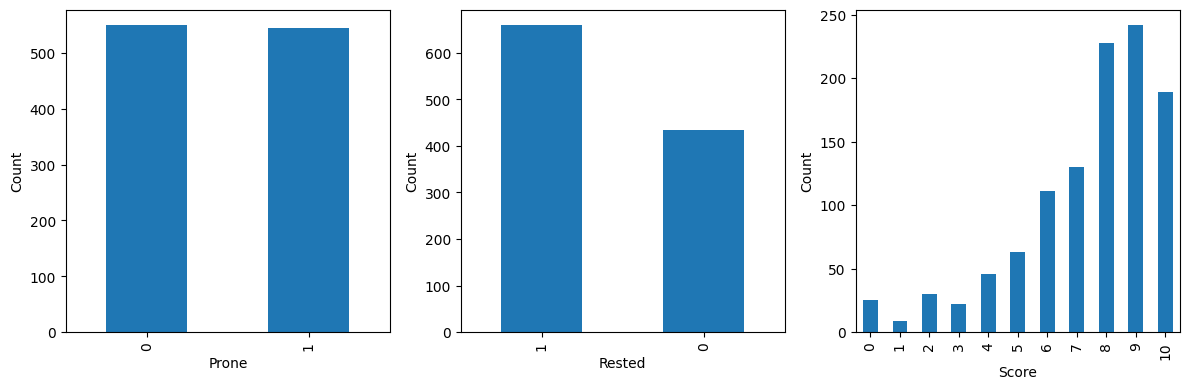

In [7]:
print(df_score_csv['prone'].value_counts())
print(df_score_csv['rest'].value_counts())
print(df_score_csv['score'].value_counts().sort_index())

# You can also visualize these distributions using histograms
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
df_score_csv['prone'].value_counts().plot(kind='bar')
plt.xlabel('Prone')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
df_score_csv['rest'].value_counts().plot(kind='bar')
plt.xlabel('Rested')
plt.ylabel('Count')


plt.subplot(1, 3, 3)
df_score_csv['score'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Score')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


Of a total of 1095 shots taken, there are two different binary variables to consider (prone and rested). The score is given on a interval scale, ranging from 0 to 10 (11 values) and seems highly skewed.


#### TASK: Make a regression between prone & rested as input and score as output. Write your code below

In [8]:
# your code goes here

In [9]:
# Prepare the data
X = df_score_csv[['prone', 'rest']]
y = df_score_csv['score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# You can also print the coefficients and intercept of the model
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

Mean Squared Error: 3.337646912169591
R-squared: 0.3358081259924246
Coefficients: [2.76432609 1.01460821]
Intercept: 5.380163255900646


#### TASK: Find out if athletes score better when they are rested. Also try to find out if the shoot better in a standing or prone pose.

In [10]:
# your code goes here

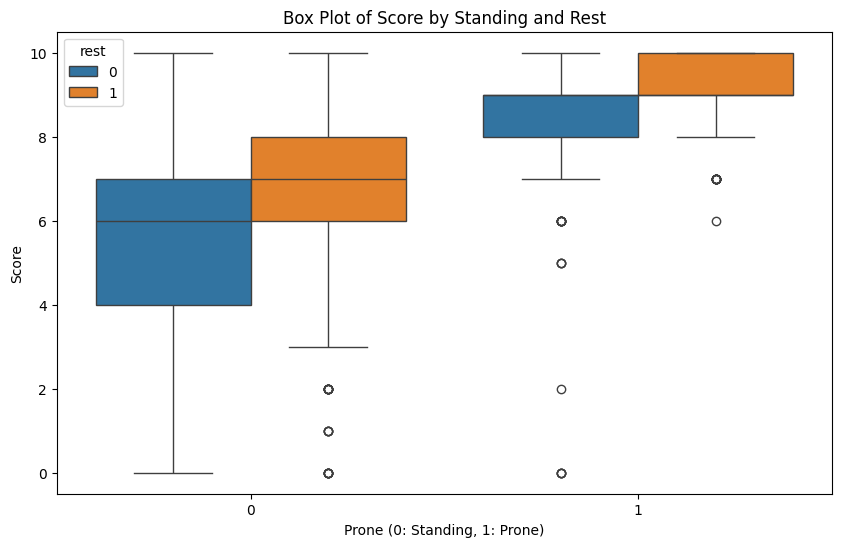

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='prone', y='score', hue='rest', data=df_score_csv)
plt.title('Box Plot of Score by Standing and Rest')
plt.xlabel('Prone (0: Standing, 1: Prone)')
plt.ylabel('Score')
plt.show()

#### TASK: What is the plot and the numbers above telling us?